In [5]:
# 2. Import Libraries and read data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Car_sales.csv')

In [6]:
# 3. Print first 5 items and last 3 items
print(df.head(5))
print(df.tail(3))

  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

In [7]:
# 4. Print out info about dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [8]:
# 5. Print description
print(df.describe())

       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000 

In [9]:
# 6. Print Shape
print(df.shape)

(157, 16)


In [10]:
# 7. Count the missing/null values
print(df.isnull().sum())

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [11]:
# 8. Drop all columns with 20% missing
df = df.dropna(thresh=len(df)*0.8, axis=1)

In [12]:
# 9. Drop all rows with missing values
df = df.dropna()

In [13]:
# 10. Print shape, info, description and sum of null values
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(152, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        152 non-null    object 
 1   Model               152 non-null    object 
 2   Sales_in_thousands  152 non-null    float64
 3   Vehicle_type        152 non-null    object 
 4   Price_in_thousands  152 non-null    float64
 5   Engine_size         152 non-null    float64
 6   Horsepower          152 non-null    float64
 7   Wheelbase           152 non-null    float64
 8   Width               152 non-null    float64
 9   Length              152 non-null    float64
 10  Curb_weight         152 non-null    float64
 11  Fuel_capacity       152 non-null    float64
 12  Fuel_efficiency     152 non-null    float64
 13  Latest_Launch       152 non-null    object 
 14  Power_perf_factor   152 non-null    float64
dtypes: float64(11), object(4)
memory usage: 19.0+ KB
Non

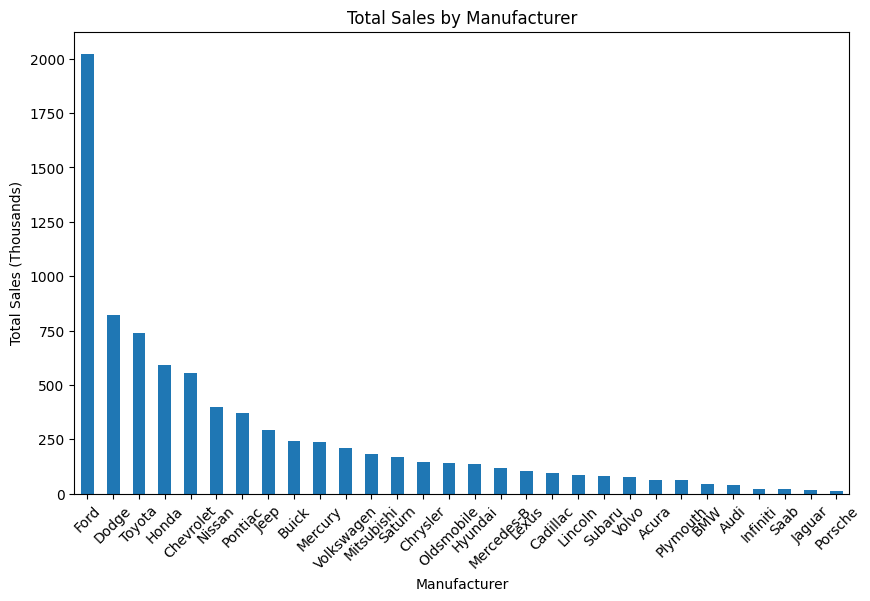

In [22]:
## PART 2
# 1. Bar graph of total sales by manufacurer
manu_sales = df.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
manu_sales.plot(kind='bar')
plt.title('Total Sales by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales (Thousands)')
plt.xticks(rotation=45)
plt.show()

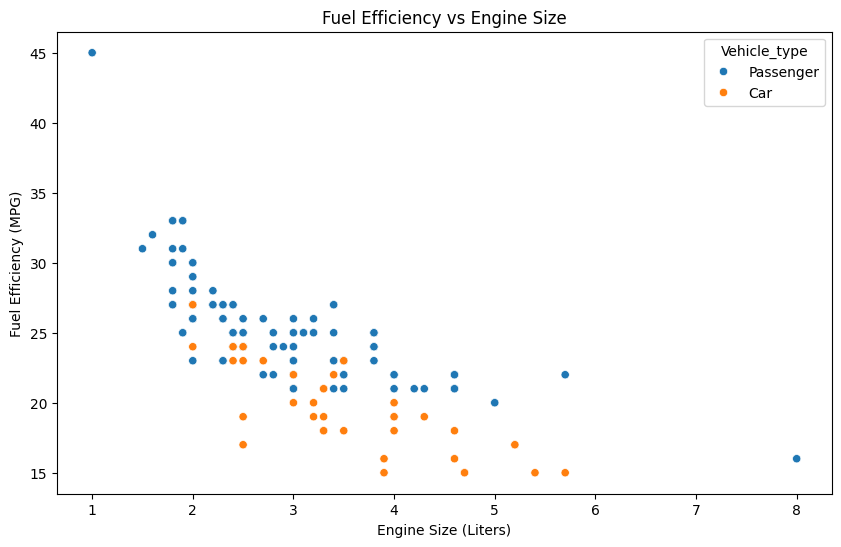

In [25]:
# 2. Scatter plot for fuel efficiency
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Engine_size', y='Fuel_efficiency', hue='Vehicle_type')
plt.title('Fuel Efficiency vs Engine Size')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.show()

In [26]:
# 3. Create a new column
car_origin = {'Ford': 'North America', 'Chevrolet': 'North America', 'Toyota': 'Asia', 'Honda': 'Asia', 'Volkswagen': 'Europe', 'Audi': 'Europe'}
df['Origin']=df['Manufacturer'].map(car_origin)

In [28]:
# 4. Compute revenue
df['Revenue']=(df['Sales_in_thousands']*df['Price_in_thousands']) * 1000

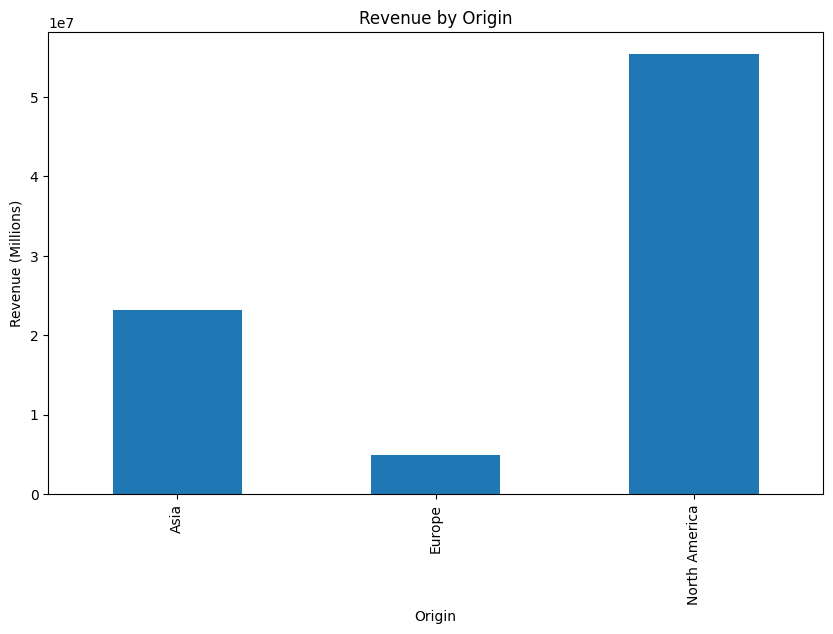

In [30]:
# 5. Bar graph comparing origina and revenue
or_rev = df.groupby('Origin')['Revenue'].sum()

plt.figure(figsize=(10,6))
or_rev.plot(kind='bar')
plt.title('Revenue by Origin')
plt.xlabel('Origin')
plt.ylabel('Revenue (Millions)')
plt.show()

In [35]:
# 6. New column called launch year
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])

# Extract year since launch
df['Launch_Year'] = df['Latest_Launch'].dt.year
df['Launch_Month'] = df['Latest_Launch'].dt.month

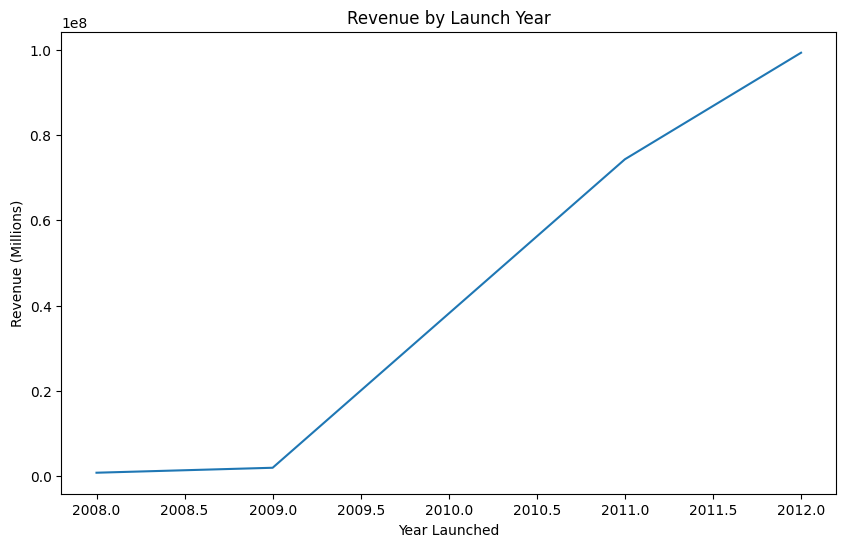

In [36]:
# 7. Line plot year vs revenue
year_rev = df.groupby('Launch_Year')['Revenue'].sum()

plt.figure(figsize=(10,6))
year_rev.plot(kind='line')
plt.title('Revenue by Launch Year')
plt.xlabel('Year Launched')
plt.ylabel('Revenue (Millions)')
plt.show()

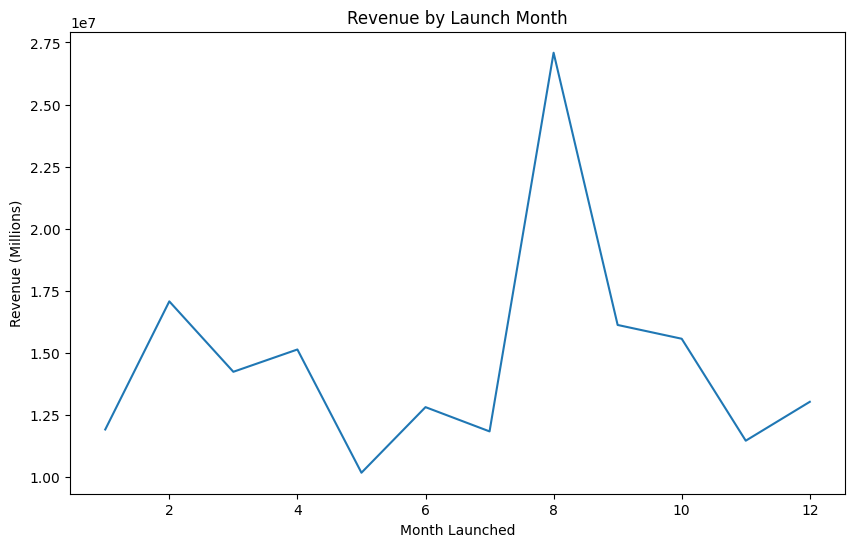

In [38]:
# 8. Line plot month vs revenue
month_rev = df.groupby('Launch_Month')['Revenue'].sum()

plt.figure(figsize=(10,6))
month_rev.plot(kind='line')
plt.title('Revenue by Launch Month')
plt.xlabel('Month Launched')
plt.ylabel('Revenue (Millions)')
plt.show()